In [1]:
import tensorflow as tf
tf.enable_eager_execution()
import PIL.Image as Image

In [2]:
import numpy as np
import cv2

In [3]:
filename = '/home/yaosy/Diskb/projects/blitznet_instance_segment/Datasets/coco-seg-train2014-00000-of-00001'
raw_dataset = tf.data.TFRecordDataset(filename)
raw_dataset

<TFRecordDataset shapes: (), types: tf.string>

In [4]:
keys_to_features = {
    'image/encoded': tf.FixedLenFeature(
        (), tf.string, default_value=''),
    'image/format': tf.FixedLenFeature(
        (), tf.string, default_value='JPEG'),
    'image/segmentation/encoded': tf.FixedLenFeature(
        (), tf.string, default_value=''),
    'image/segmentation/format': tf.FixedLenFeature(
        (), tf.string, default_value='RAW'),
    'image/object/bbox/xmin': tf.VarLenFeature(
        dtype=tf.float32),
    'image/object/bbox/ymin': tf.VarLenFeature(
        dtype=tf.float32),
    'image/object/bbox/xmax': tf.VarLenFeature(
        dtype=tf.float32),
    'image/object/bbox/ymax': tf.VarLenFeature(
        dtype=tf.float32),
    'image/object/class/label': tf.VarLenFeature(
        dtype=tf.int64),
    'image/object/difficulty': tf.VarLenFeature(
        dtype=tf.int64),
    'image/height': tf.FixedLenFeature(
        [], tf.int64, default_value=0),
    'image/width': tf.FixedLenFeature(
        [], tf.int64, default_value=0),
    'image/instance': tf.VarLenFeature(
        dtype=tf.int64),
    'image/num_instances': tf.FixedLenFeature(
        [], tf.int64, default_value=0),
}

def _parse_function(example_proto):
  # Parse the input tf.Example proto using the dictionary above.
  return tf.parse_single_example(example_proto, keys_to_features)

In [5]:
parsed_dataset = raw_dataset.map(_parse_function)

In [6]:
parsed_dataset

<MapDataset shapes: {image/object/class/label: (?,), image/num_instances: (), image/object/bbox/ymin: (?,), image/encoded: (), image/format: (), image/object/bbox/xmax: (?,), image/object/bbox/xmin: (?,), image/object/difficulty: (?,), image/segmentation/encoded: (), image/segmentation/format: (), image/object/bbox/ymax: (?,), image/height: (), image/instance: (?,), image/width: ()}, types: {image/object/class/label: tf.int64, image/num_instances: tf.int64, image/object/bbox/ymin: tf.float32, image/encoded: tf.string, image/format: tf.string, image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/difficulty: tf.int64, image/segmentation/encoded: tf.string, image/segmentation/format: tf.string, image/object/bbox/ymax: tf.float32, image/height: tf.int64, image/instance: tf.int64, image/width: tf.int64}>

In [7]:
t1 = parsed_dataset.take(1)

In [17]:
for t in parsed_dataset.take(4):
    t_n = t['image/num_instances']
    t_w = t['image/width']
    t_h = t['image/height']
    b_x1 = t['image/object/bbox/xmin']
    b_y1 = t['image/object/bbox/ymin']
    b_x2 = t['image/object/bbox/xmax']
    b_y2 = t['image/object/bbox/ymax']
    t_cl = t['image/object/class/label']
    t_ins = t['image/instance']

In [19]:
t_ins_temp = t_ins

In [20]:
t_ins = t_ins_temp.values

t_ins = tf.reshape(t_ins, (20, t_h.numpy(), t_w.numpy()))

In [21]:
t_ins_np = t_ins.numpy()

In [22]:
t_ins_np.shape[:]

(20, 700, 1000)

In [26]:
t_ins = tf.transpose(t_ins, [1, 2, 0])
t_ins_np = t_ins.numpy()

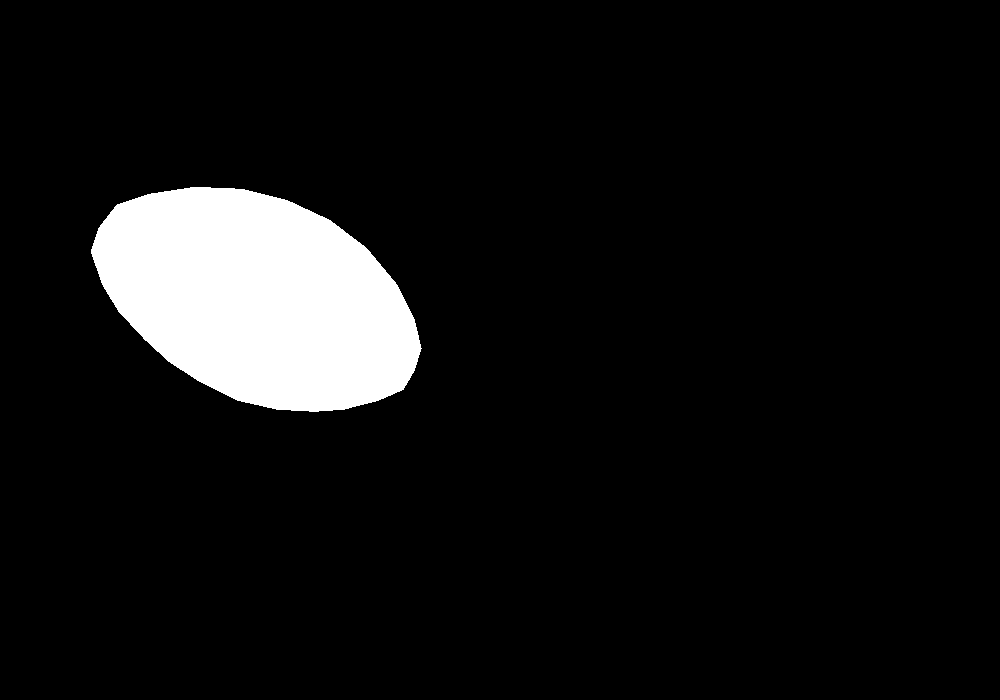

In [30]:
test_img = t_ins_np[:, :, 0]
x, y = np.where(test_img > 0)
test_img[x, y] = 255
test_img = test_img.astype(np.uint8)
Image.fromarray(test_img)

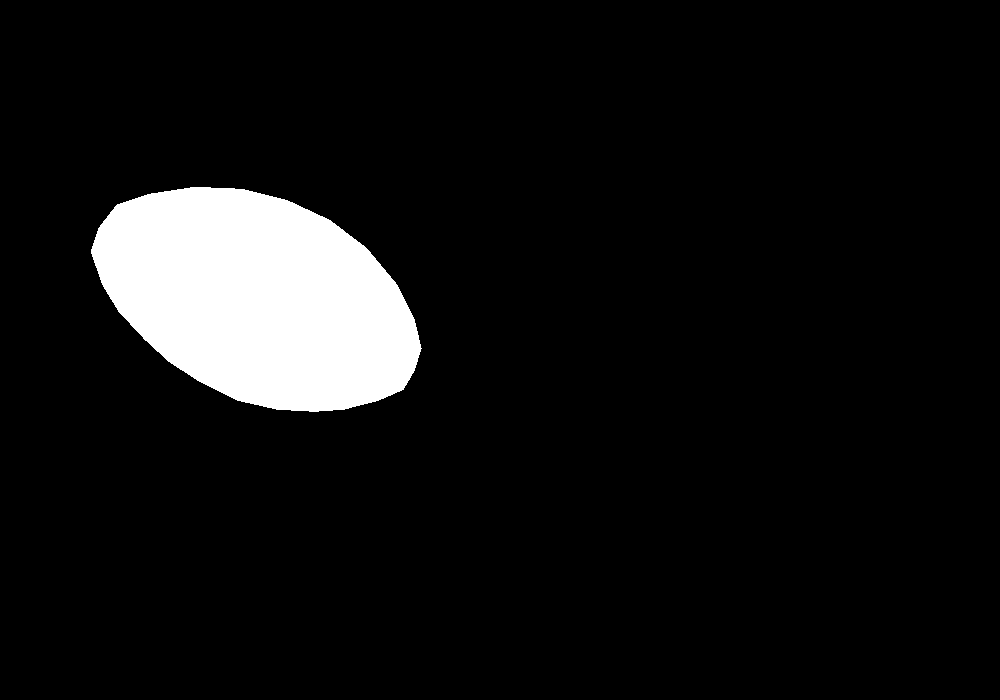

In [23]:
test_img = t_ins_np[0, :, :]
x, y = np.where(test_img > 0)
test_img[x, y] = 255
test_img = test_img.astype(np.uint8)
Image.fromarray(test_img)

In [139]:
tf.stack((b_y1.values, b_x1.values, b_y2.values, b_x2.values), axis=1)

<tf.Tensor: id=1111, shape=(4, 4), dtype=float32, numpy=
array([[ 0.26671898,  0.09058242,  0.58814752,  0.42158243],
       [ 0.5624333 ,  0.28358242,  0.8824333 ,  0.57458246],
       [ 0.14529043,  0.50258243,  0.54529047,  0.78658247],
       [ 0.49957615,  0.65258241,  0.8710047 ,  0.91358244]], dtype=float32)>

In [ ]:
tf.ima

In [ ]:
cv2.boundingRect()

In [65]:
ins_np3 = t_ins_np[5] > 0
ins_np3 = ins_np3.astype(np.float32)

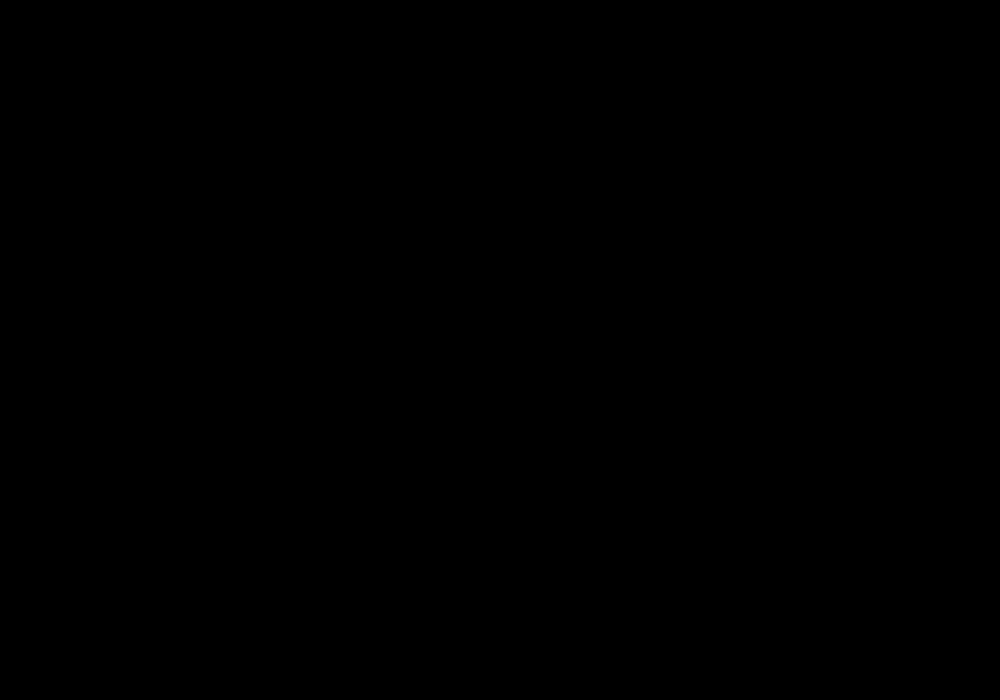

In [66]:
Image.fromarray(ins_np3, 'L')

In [18]:
t_cl.values

<tf.Tensor: id=1173, shape=(3,), dtype=int64, numpy=array([15, 15, 15])>

In [10]:
t1_np = t1.values.numpy()

In [11]:
t1_np[t1_np != 0]

array([15, 15, 15, ..., 15, 15, 15])

In [17]:
tf.stack([1,2, tf.constant(2)]).shape

TensorShape([Dimension(3)])

In [14]:
tf.concat([tf.constant([1, 2]), tf.constant(2)], axis=0)

InvalidArgumentError: ConcatOp : Ranks of all input tensors should match: shape[0] = [2] vs. shape[1] = [] [Op:ConcatV2] name: concat